***Exploratory Data Analysis Notebook***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA


In [ ]:
df = pd.read_csv("datasets/final_df_with_model_vector_column.csv")
df["labels"] = df["model_family_vector"].apply(ast.literal_eval)

# Load label mapping
model_classes = pd.read_csv("datasets/model_family_classes.csv", header=None).squeeze().dropna().astype(str).tolist()

# Basic Info
print(f"Total Papers: {len(df)}")
print(f"Sample Paper:\n{df.iloc[0]['introduction_cleaned'][:300]}...\nLabels: {df.iloc[0]['labels']}")


Total Papers: 725
Sample Paper:
Emotion recognition has wide applications in psychology,
medicine and designing human-computer interaction systems
[1]. In particular, using speech data for emotion recognition is
popular because it’s collection is easy, non-invasive and cheap.
Given that datasets available for this task are typical...
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


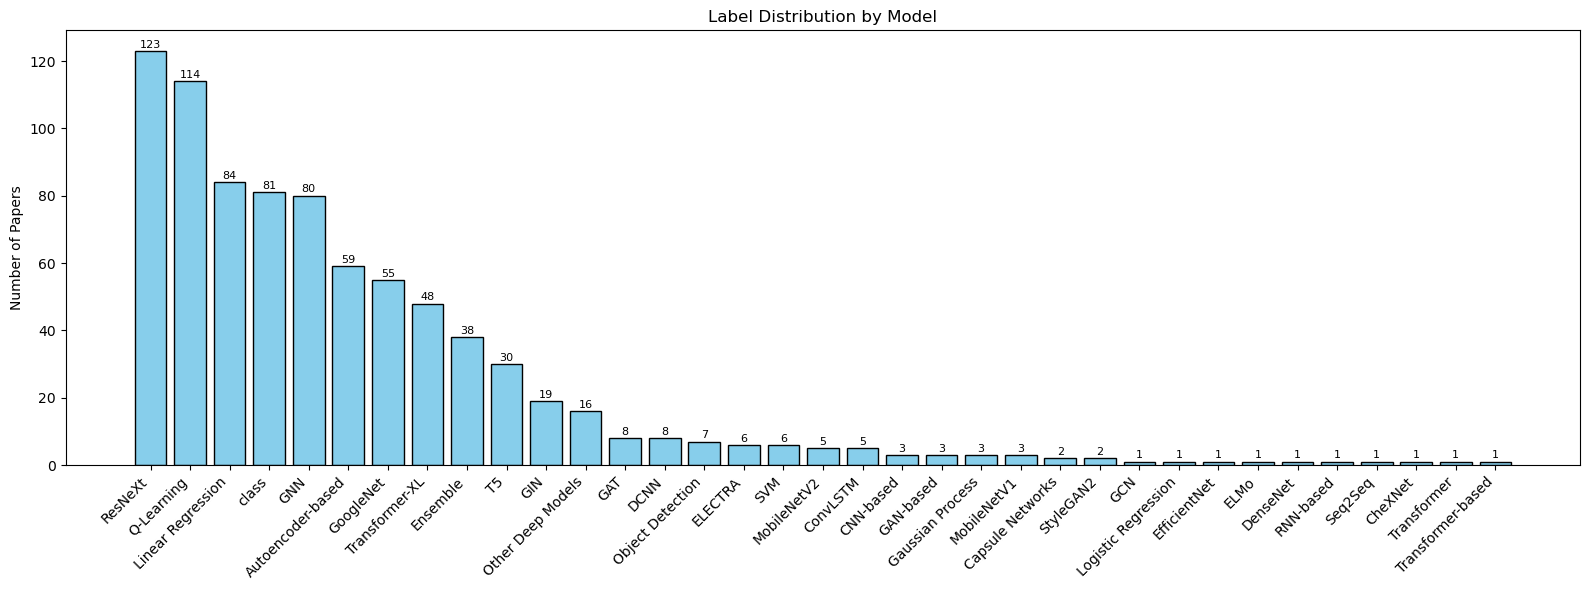

In [ ]:
# Distribution of Labels

# Count occurrences
label_matrix = np.array(df["labels"].tolist())
label_counts = np.sum(label_matrix, axis=0)

# Sorted
sorted_indices = np.argsort(label_counts)[::-1]
sorted_labels = [model_classes[i] for i in sorted_indices]
sorted_counts = label_counts[sorted_indices]

# Bar Plot
plt.figure(figsize=(16, 6))
plt.bar(sorted_labels, sorted_counts, color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.title("Label Distribution by Model")
plt.ylabel("Number of Papers")

# Add counts
for i, c in enumerate(sorted_counts):
    plt.text(i, c + 1, str(int(c)), ha='center', fontsize=8)
plt.tight_layout()
plt.show()

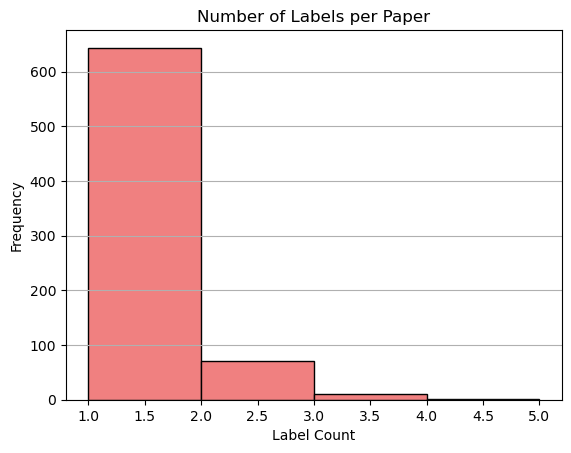

In [6]:
df["labels"] = df["model_family_vector"].apply(ast.literal_eval)
num_labels = df["labels"].apply(lambda x: sum(x))

plt.hist(num_labels, bins=range(1, num_labels.max() + 2), color="lightcoral", edgecolor="black")
plt.title("Number of Labels per Paper")
plt.xlabel("Label Count")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

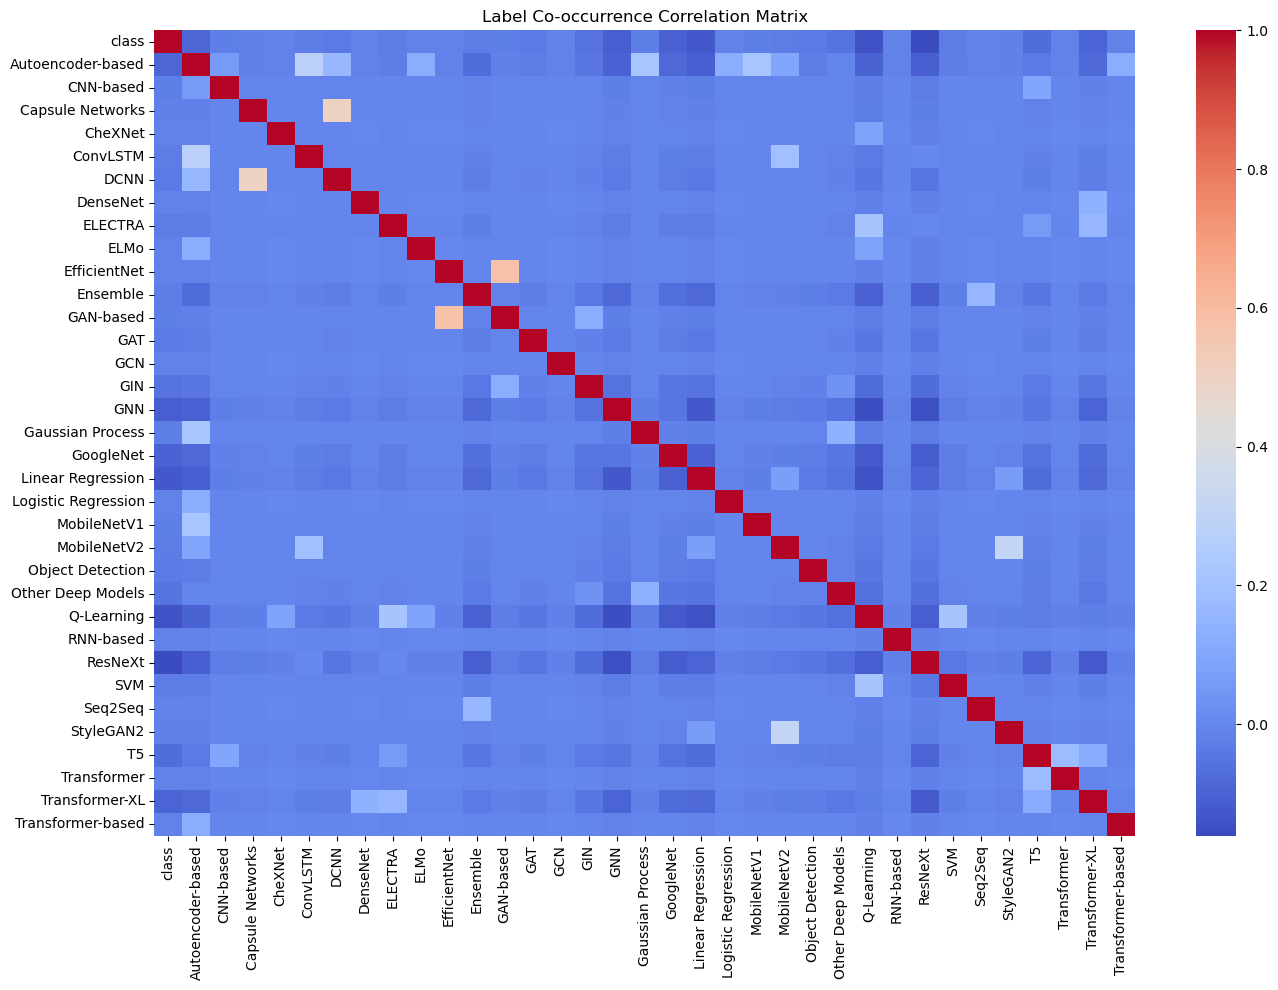

In [ ]:
# Reload label matrix
df = pd.read_csv("datasets/final_df_with_model_vector_column.csv")
df["labels"] = df["model_family_vector"].apply(ast.literal_eval)
label_matrix = np.array(df["labels"].tolist())

# Reload and clean label names
raw_classes = pd.read_csv("datasets/model_family_classes.csv", header=None).squeeze()
model_classes = raw_classes.dropna().astype(str).tolist()

# Make sure we only take as many class names as columns in the matrix
model_classes = model_classes[:label_matrix.shape[1]]

# Now create DataFrame
label_df = pd.DataFrame(label_matrix, columns=model_classes)

# Correlation matrix
corr = label_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title("Label Co-occurrence Correlation Matrix")
plt.tight_layout()
plt.show()


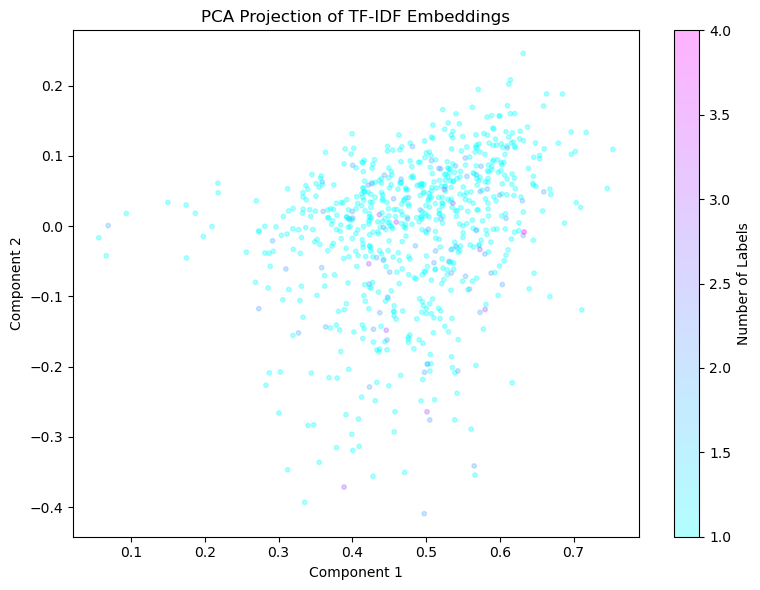

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

df["combined_text"] = df["introduction_cleaned"] + " " + df["conclusion_cleaned"]
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df["combined_text"])

# Reduce to 2D for plotting
svd = TruncatedSVD(n_components=2, random_state=42)
X_pca = svd.fit_transform(X_tfidf)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=10, c=num_labels, cmap='cool')
plt.title("PCA Projection of TF-IDF Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Number of Labels")
plt.tight_layout()
plt.show()


['class']


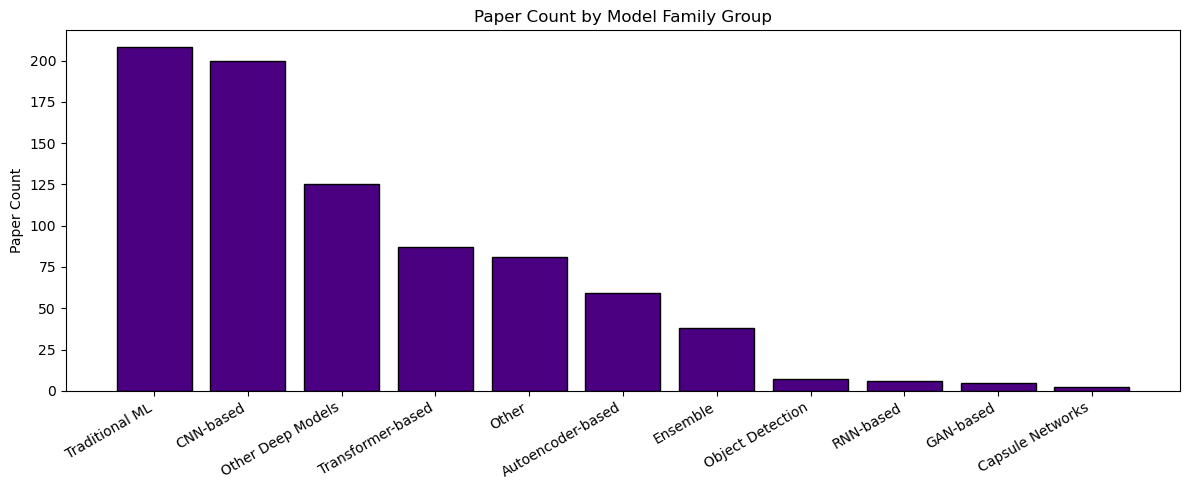

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from collections import Counter

# Load raw labels
df = pd.read_csv("datasets/final_df_with_model_vector_column.csv")
df["labels"] = df["model_family_vector"].apply(ast.literal_eval)

# Load class names (raw, may include ResNet, T5, etc.)
model_classes = pd.read_csv("datasets/model_family_classes.csv", header=None).squeeze().dropna().astype(str).tolist()
model_classes = model_classes[:len(df["labels"].iloc[0])]
label_matrix = np.array(df["labels"].tolist())
label_totals = np.sum(label_matrix, axis=0)

# === Model family mapping ===
model_groups = {
    'CNN-based': ['CNN', 'AlexNet', 'VGG', 'VGG-16', 'VGG-19', 'ResNet', 'Inception', 'Xception', 'ZFNet', 'LeNet'],
    'RNN-based': ['RNN', 'LSTM', 'GRU', 'BiLSTM'],
    'Transformer-based': ['BERT', 'RoBERTa', 'ALBERT', 'XLNet', 'GPT', 'ViT', 'DeBERTa', 'DistilBERT', 'T5', 'Transformer'],
    'GAN-based': ['GAN', 'CycleGAN', 'StyleGAN', 'BigGAN', 'BigGAN-Deep', 'DCGAN', 'cGAN', 'StyleGAN2'],
    'Autoencoder-based': ['Autoencoder', 'VAE', 'Beta-VAE', 'Sparse Autoencoder'],
    'Object Detection': ['YOLO', 'YOLOv3', 'YOLOv4', 'Faster R-CNN', 'SSD', 'RetinaNet', 'RCNN'],
    'Spiking NN': ['SNN'],
    'Capsule Networks': ['Capsule Network'],
    'Unet-based': ['U-Net', 'U-Net++'],
    'Ensemble': ['AdaBoost', 'Bagging', 'Stacking'],
    'Other Deep Models': ['Deep Belief Network', 'DBN', 'RBM', 'MLP', 'ANN', 'GIN', 'GAT', 'GraphSAGE', 'GIN', 'GCN'],
}
traditional_ml_models = ['SVM', 'Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Linear Regression', 'Q-Learning']

# Add other models to model_groups and traditional_ml_models

# Add these to appropriate groups
model_groups['CNN-based'].extend(['ResNeXt', 'EfficientNet', 'DenseNet', 'CheXNet'])
model_groups['Transformer-based'].extend(['ELECTRA', 'ELMo'])
model_groups['Other Deep Models'].extend(['GNN', 'Seq2Seq'])
traditional_ml_models.append('Gaussian Process')

# Add explicit categories to be matched exactly
# (They were likely already in the label list as generalized group names)
model_groups["Other Deep Models"].append("Other Deep Models")
model_groups["Object Detection"].append("Object Detection")
model_groups["Ensemble"].append("Ensemble")
model_groups["Spiking NN"].append("Spiking NN")

# Reverse map
reverse_map = {}
for group, models in model_groups.items():
    for m in models:
        reverse_map[m] = group
for m in traditional_ml_models:
    reverse_map[m] = "Traditional ML"

def map_model_to_group(label):
    # Normalize
    label = label.strip().lower()

    for group, models in model_groups.items():
        for m in models:
            if m.lower() in label:
                return group
    for m in traditional_ml_models:
        if m.lower() in label:
            return "Traditional ML"
    return "Other"

# Group label totals
group_totals = {}
for i, label in enumerate(model_classes):
    group = map_model_to_group(label)
    group_totals[group] = group_totals.get(group, 0) + label_totals[i]

unmapped = [model_classes[i] for i in range(len(model_classes)) if map_model_to_group(model_classes[i]) == "Other"]
print(unmapped)


# Sort and plot
group_labels, group_freqs = zip(*sorted(group_totals.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 5))
plt.bar(group_labels, group_freqs, color="indigo", edgecolor="black")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Paper Count")
plt.title("Paper Count by Model Family Group")
plt.tight_layout()
plt.show()
